<a href="https://colab.research.google.com/github/radhakrishnan-omotec/arwan-iris-dog-repo/blob/main/RPI_TESTING_Dog_Emotion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Extracting the Dataset

In [ ]:
!unzip '/content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET-20241117T062359Z-001.zip' -d '/content/drive/MyDrive/Arwan IRIS'

Archive:  /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET-20241117T062359Z-001.zip
  inflating: /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET/labels.xlsx  
  inflating: /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET/dog_emotion_image_7_defensive/3974079713_8a083d376a_b.jpg  
  inflating: /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET/dog_emotion_image_7_defensive/3928735562_9f7f41edc3_b.jpg  
  inflating: /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET/dog_emotion_image_7_defensive/3917409040_9367e8e207_b.jpg  
  inflating: /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET/dog_emotion_image_7_defensive/3880250382_260e6466c0_b.jpg  
  inflating: /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET/dog_emotion_image_7_defensive/3885939043_c2856ee6fb_b.jpg  
  inflating: /content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET/dog_emotion_image_7_defensive/4024173645_02494083e1_b.jpg  
  inflating: /content/drive/MyDrive/

In [ ]:
dataset_dir = "/content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET"

In [ ]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)

In [ ]:
dataset_dir

PosixPath('/content/drive/MyDrive/Arwan IRIS/2-EMOTION_IMAGE_DATASET')

<hr>
<hr>
<hr>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Dataset Exploration

# Count of images in the dataset

In [ ]:
dataset_image_count = len(list(dataset_dir.glob('*/*.jpg')))

In [ ]:
print(dataset_image_count)

994


In [ ]:
# Define data generators with data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0,
    validation_split = 0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
batch_size = 16

In [ ]:
training_data = datagen.flow_from_directory(
    dataset_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    subset = 'training'
)

Found 796 images belonging to 10 classes.


In [ ]:
testing_data = datagen.flow_from_directory(
    dataset_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    subset = 'validation'
)

Found 198 images belonging to 10 classes.


In [ ]:
training_data.class_indices

{'dog_emotion_image_10_affectionate': 0,
 'dog_emotion_image_1_alert': 1,
 'dog_emotion_image_2_pain': 2,
 'dog_emotion_image_3_anxious': 3,
 'dog_emotion_image_4_threatened': 4,
 'dog_emotion_image_5_angry': 5,
 'dog_emotion_image_6_stressed': 6,
 'dog_emotion_image_7_defensive': 7,
 'dog_emotion_image_8_stress_release': 8,
 'dog_emotion_image_9_friendly': 9}

In [ ]:
testing_data.class_indices

{'dog_emotion_image_10_affectionate': 0,
 'dog_emotion_image_1_alert': 1,
 'dog_emotion_image_2_pain': 2,
 'dog_emotion_image_3_anxious': 3,
 'dog_emotion_image_4_threatened': 4,
 'dog_emotion_image_5_angry': 5,
 'dog_emotion_image_6_stressed': 6,
 'dog_emotion_image_7_defensive': 7,
 'dog_emotion_image_8_stress_release': 8,
 'dog_emotion_image_9_friendly': 9}

In [ ]:
class_names = training_data.class_indices
print(class_names)

{'dog_emotion_image_10_affectionate': 0, 'dog_emotion_image_1_alert': 1, 'dog_emotion_image_2_pain': 2, 'dog_emotion_image_3_anxious': 3, 'dog_emotion_image_4_threatened': 4, 'dog_emotion_image_5_angry': 5, 'dog_emotion_image_6_stressed': 6, 'dog_emotion_image_7_defensive': 7, 'dog_emotion_image_8_stress_release': 8, 'dog_emotion_image_9_friendly': 9}


In [ ]:
model = Sequential([
    layers.Conv2D(
        32,
        (3,3),
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(
        32,
        (3,3),
        activation = 'relu',
    ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(
        32,
        (3,3),
        activation = 'relu',
    ),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 32)       

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [ ]:
training_steps = training_data.samples // batch_size
testing_steps = testing_data.samples // batch_size

In [ ]:
training_steps

49

In [ ]:
testing_steps

12

In [ ]:
# Ensure labels are one-hot encoded and there are no NaN values
print(training_data.classes[:10])  # Check the labels
print(training_data.classes.shape)  # Ensure shape matches the number of classes

# Compile the model with categorical crossentropy for one-hot encoded labels
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    training_data,
    validation_data=testing_data,
    epochs=60,
    steps_per_epoch=training_steps,
    validation_steps=testing_steps
)


[0 0 0 0 0 0 0 0 0 0]
(796,)
Epoch 1/60
49/49 [==============================] - 16s 304ms/step - loss: 2.3048 - accuracy: 0.1000 - val_loss: 2.3021 - val_accuracy: 0.0990
Epoch 2/60
49/49 [==============================] - 15s 296ms/step - loss: 2.3055 - accuracy: 0.0918 - val_loss: 2.3023 - val_accuracy: 0.1042
Epoch 3/60
49/49 [==============================] - 15s 299ms/step - loss: 2.3034 - accuracy: 0.0987 - val_loss: 2.3020 - val_accuracy: 0.0938
Epoch 4/60
49/49 [==============================] - 15s 297ms/step - loss: 2.3029 - accuracy: 0.0910 - val_loss: 2.3017 - val_accuracy: 0.1250
Epoch 5/60
49/49 [==============================] - 15s 300ms/step - loss: 2.3059 - accuracy: 0.0846 - val_loss: 2.2939 - val_accuracy: 0.0885
Epoch 6/60
49/49 [==============================] - 15s 300ms/step - loss: 2.3048 - accuracy: 0.1038 - val_loss: 2.3029 - val_accuracy: 0.0885
Epoch 7/60
49/49 [==============================] - 15s 299ms/step - loss: 2.3036 - accuracy: 0.1051 - val_loss: 

### Make Predictions

13/13 [==============================] - 3s 204ms/step - loss: 2.2816 - accuracy: 0.1162


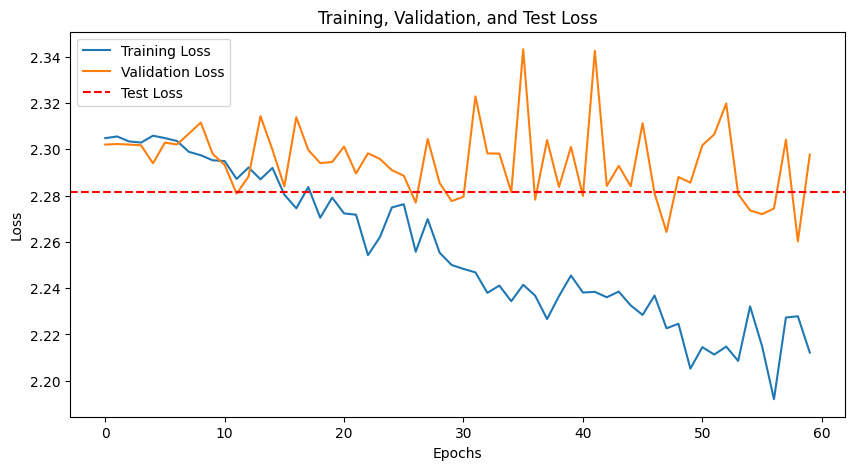

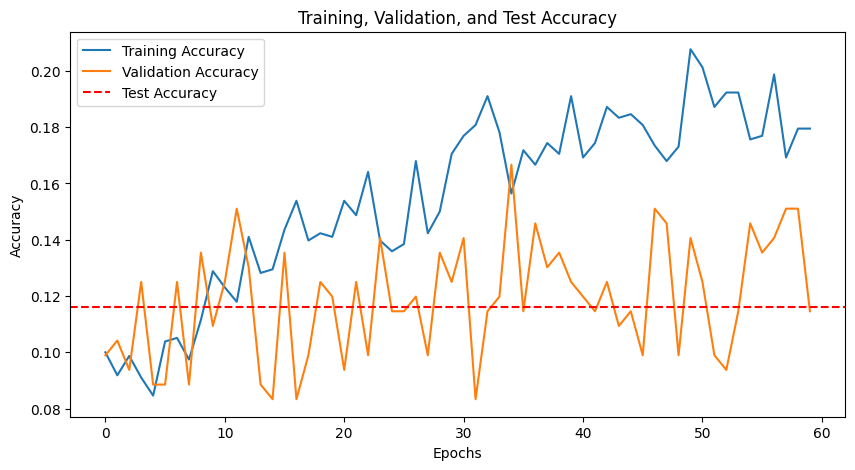

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(testing_data)

# Plot the training, validation, and testing loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training, validation, and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for test set
y_pred = np.argmax(model.predict(testing_data), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(testing_data.classes, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=testing_data.class_indices.keys(),
            yticklabels=testing_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/Arwan IRIS/model/'

In [ ]:
#Save the model
model.save(save_model_folder + 'Dog_Emotion_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### AlexNet Architecture

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(224, 224, 3)),

    # Conv block 1
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid'),

    # Conv block 2
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid'),

    # Conv block 3
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='valid'),

    # Flatten and dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Dropout 1
    tf.keras.layers.Dropout(0.5),

    # Fully Connected 1
    tf.keras.layers.Dense(4096, activation='relu'),

    # Dropout 2
    tf.keras.layers.Dropout(0.5),

    # Fully Connected 2
    tf.keras.layers.Dense(4096, activation='relu'),

    # Fully Connected 3
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:
training_steps = training_data.samples // batch_size
testing_steps = testing_data.samples // batch_size

In [ ]:
training_steps

49

In [ ]:
testing_steps

12

In [ ]:
history = model.fit(
    training_data,
    validation_data = testing_data,
    epochs = 200,
    steps_per_epoch = training_steps,
    validation_steps = testing_steps
)

Epoch 1/200
49/49 [==============================] - 204s 4s/step - loss: 2.3073 - accuracy: 0.0936 - val_loss: 2.3017 - val_accuracy: 0.0990
Epoch 2/200
49/49 [==============================] - 17s 342ms/step - loss: 2.3068 - accuracy: 0.0897 - val_loss: 2.3020 - val_accuracy: 0.1094
Epoch 3/200
49/49 [==============================] - 17s 339ms/step - loss: 2.3045 - accuracy: 0.1051 - val_loss: 2.3023 - val_accuracy: 0.0885
Epoch 4/200
49/49 [==============================] - 17s 337ms/step - loss: 2.3049 - accuracy: 0.0923 - val_loss: 2.3021 - val_accuracy: 0.0885
Epoch 5/200
49/49 [==============================] - 17s 343ms/step - loss: 2.3034 - accuracy: 0.0910 - val_loss: 2.3022 - val_accuracy: 0.1146
Epoch 6/200
49/49 [==============================] - 17s 341ms/step - loss: 2.3065 - accuracy: 0.0795 - val_loss: 2.3022 - val_accuracy: 0.0990
Epoch 7/200
49/49 [==============================] - 17s 338ms/step - loss: 2.3043 - accuracy: 0.0949 - val_loss: 2.3024 - val_accuracy: 0

In [ ]:
#Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/Arwan IRIS/model/'

In [ ]:
#Save the model
model.save(save_model_folder + 'Dog_Emotion_(ALEX)CNN.h5')

In [ ]:
predictions = model.predict(testing_data)
predictions

13/13 [==============================] - 3s 212ms/step


array([[0.11251465, 0.10108862, 0.12533553, ..., 0.08316205, 0.10828134,
        0.11316191],
       [0.1161451 , 0.10579313, 0.11503889, ..., 0.08629459, 0.11039921,
        0.11114603],
       [0.12094011, 0.10830895, 0.1094169 , ..., 0.0911724 , 0.11500062,
        0.10763423],
       ...,
       [0.10563517, 0.09790941, 0.09039713, ..., 0.09641013, 0.10607825,
        0.10698383],
       [0.11604607, 0.10484018, 0.11942371, ..., 0.08582821, 0.11069534,
        0.11223251],
       [0.11125397, 0.11076515, 0.10354964, ..., 0.0930279 , 0.11077253,
        0.11036999]], dtype=float32)

In [ ]:
predictions.shape

(198, 10)

In [ ]:
score = tf.nn.softmax(predictions[24])
score

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.10190399, 0.10182245, 0.09877088, 0.09764225, 0.09895873,
       0.09903128, 0.09903526, 0.10032462, 0.10262744, 0.09988312],
      dtype=float32)>

In [ ]:
np.argmax(score)

8

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 1


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 5
1/1 [==============================] - 0s 58ms/step
Predicted Index: 2
Actual Index: 2
Predicted Class Name: ['dog_emotion_image_2_pain']
Actual Class Name: ['dog_emotion_image_2_pain']


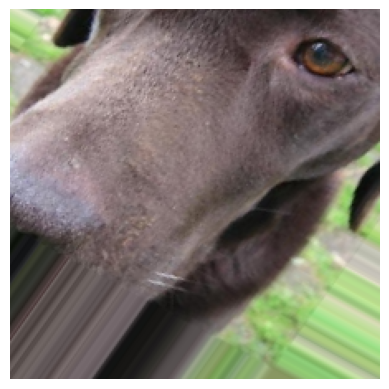

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 5
1/1 [==============================] - 0s 64ms/step
Predicted Index: 6
Actual Index: 6
Predicted Class Name: ['dog_emotion_image_6_stressed']
Actual Class Name: ['dog_emotion_image_6_stressed']


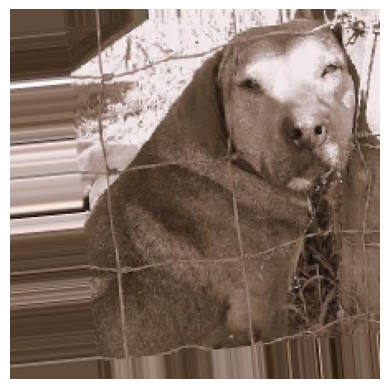

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 6
1/1 [==============================] - 0s 65ms/step
Predicted Index: 8
Actual Index: 8
Predicted Class Name: ['dog_emotion_image_8_stress_release']
Actual Class Name: ['dog_emotion_image_8_stress_release']


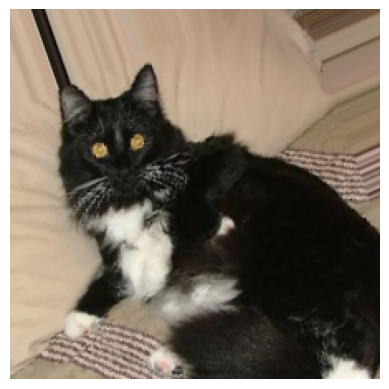

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 6
1/1 [==============================] - 0s 66ms/step
Predicted Index: 2
Actual Index: 2
Predicted Class Name: ['dog_emotion_image_2_pain']
Actual Class Name: ['dog_emotion_image_2_pain']


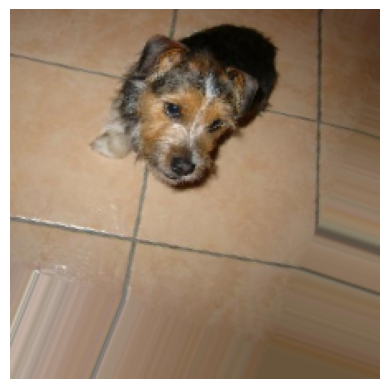

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 7
1/1 [==============================] - 0s 61ms/step
Predicted Index: 0
Actual Index: 0
Predicted Class Name: ['dog_emotion_image_10_affectionate']
Actual Class Name: ['dog_emotion_image_10_affectionate']


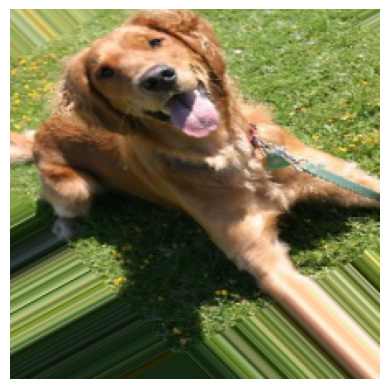

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 7
1/1 [==============================] - 0s 65ms/step
Predicted Index: 2
Actual Index: 2
Predicted Class Name: ['dog_emotion_image_2_pain']
Actual Class Name: ['dog_emotion_image_2_pain']


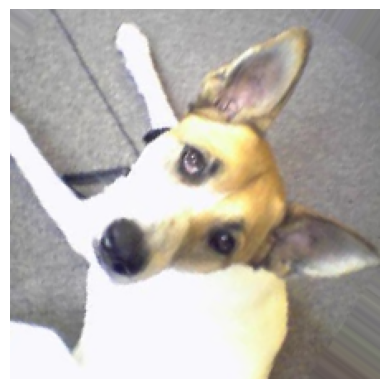

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 9
1/1 [==============================] - 0s 63ms/step
Predicted Index: 8
Actual Index: 8
Predicted Class Name: ['dog_emotion_image_8_stress_release']
Actual Class Name: ['dog_emotion_image_8_stress_release']


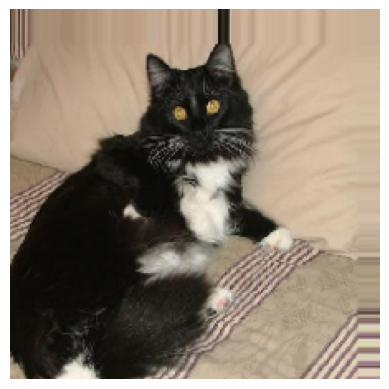

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 1
1/1 [==============================] - 0s 60ms/step
Predicted Index: 2
Actual Index: 2
Predicted Class Name: ['dog_emotion_image_2_pain']
Actual Class Name: ['dog_emotion_image_2_pain']


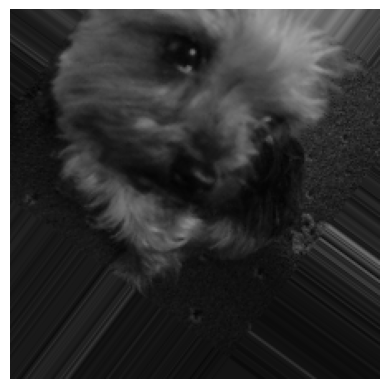

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 3
1/1 [==============================] - 0s 58ms/step
Predicted Index: 8
Actual Index: 8
Predicted Class Name: ['dog_emotion_image_8_stress_release']
Actual Class Name: ['dog_emotion_image_8_stress_release']


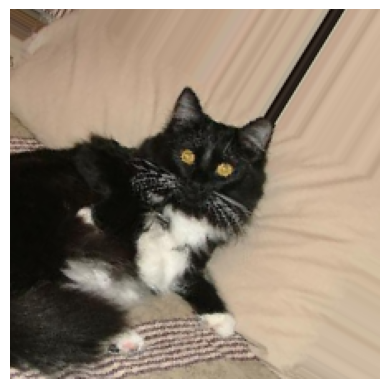

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 6
1/1 [==============================] - 0s 60ms/step
Predicted Index: 6
Actual Index: 6
Predicted Class Name: ['dog_emotion_image_6_stressed']
Actual Class Name: ['dog_emotion_image_6_stressed']


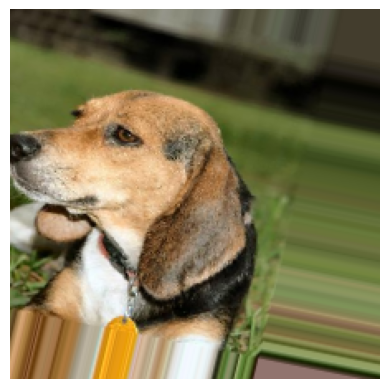

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 5
1/1 [==============================] - 0s 59ms/step
Predicted Index: 0
Actual Index: 0
Predicted Class Name: ['dog_emotion_image_10_affectionate']
Actual Class Name: ['dog_emotion_image_10_affectionate']


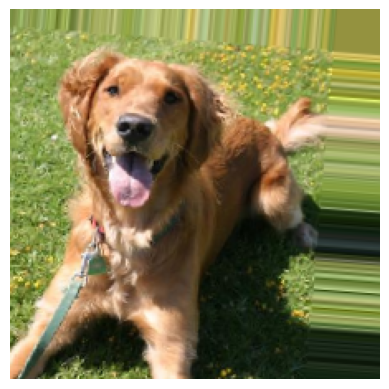

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()



Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 5
1/1 [==============================] - 0s 58ms/step
Predicted Index: 2
Actual Index: 2
Predicted Class Name: ['dog_emotion_image_2_pain']
Actual Class Name: ['dog_emotion_image_2_pain']


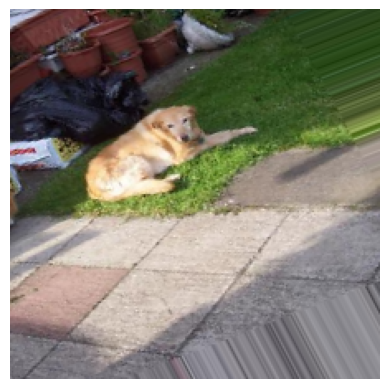

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 3
1/1 [==============================] - 0s 60ms/step
Predicted Index: 8
Actual Index: 8
Predicted Class Name: ['dog_emotion_image_8_stress_release']
Actual Class Name: ['dog_emotion_image_8_stress_release']


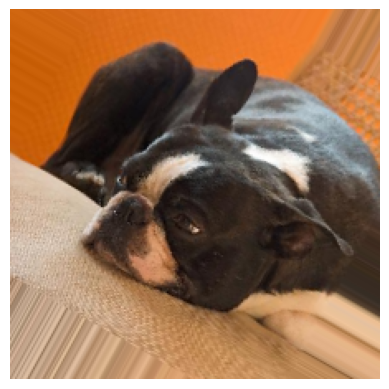

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the selected test image from the batch using Matplotlib
plt.imshow(images[input_test_image])  # Index the batch to get the specific image
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


_____________________________________________________________

Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 1
1/1 [==============================] - 0s 48ms/step
Predicted Index: 1
Actual Index: 1
Predicted Class Name: ['dog_emotion_image_1_alert']
Actual Class Name: ['dog_emotion_image_1_alert']


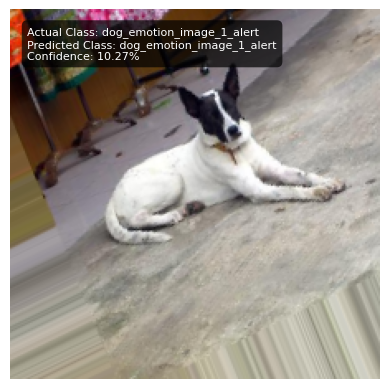

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                   f"Confidence: {confidence:.2f}%")

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 3
1/1 [==============================] - 0s 61ms/step
Predicted Index: 6
Actual Index: 6
Predicted Class Name: ['dog_emotion_image_6_stressed']
Actual Class Name: ['dog_emotion_image_6_stressed']


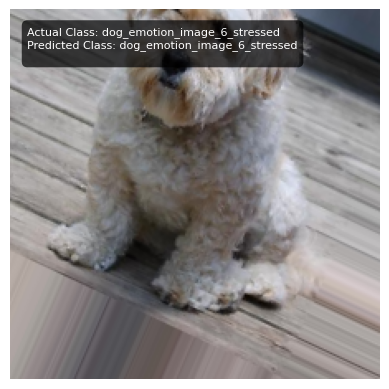

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 3
1/1 [==============================] - 0s 62ms/step
Predicted Index: 8
Actual Index: 8
Predicted Class Name: ['dog_emotion_image_8_stress_release']
Actual Class Name: ['dog_emotion_image_8_stress_release']


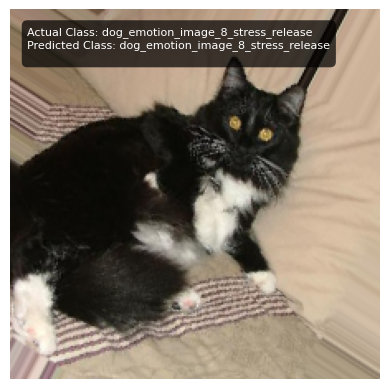

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 3
1/1 [==============================] - 0s 60ms/step
Predicted Index: 3
Actual Index: 3
Predicted Class Name: ['dog_emotion_image_3_anxious']
Actual Class Name: ['dog_emotion_image_3_anxious']


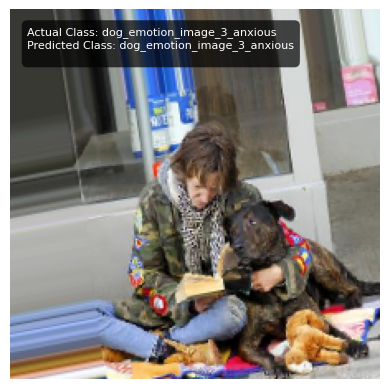

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 3
1/1 [==============================] - 0s 62ms/step
Predicted Index: 2
Actual Index: 2
Predicted Class Name: ['dog_emotion_image_2_pain']
Actual Class Name: ['dog_emotion_image_2_pain']


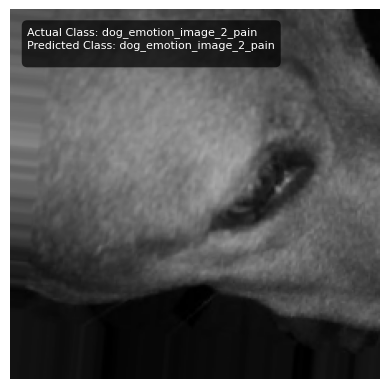

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 4
1/1 [==============================] - 0s 64ms/step
Predicted Index: 0
Actual Index: 0
Predicted Class Name: ['dog_emotion_image_10_affectionate']
Actual Class Name: ['dog_emotion_image_10_affectionate']


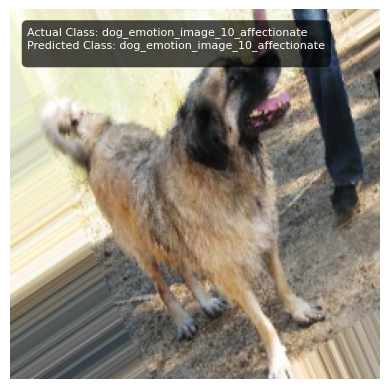

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 4
1/1 [==============================] - 0s 65ms/step
Predicted Index: 3
Actual Index: 3
Predicted Class Name: ['dog_emotion_image_3_anxious']
Actual Class Name: ['dog_emotion_image_3_anxious']


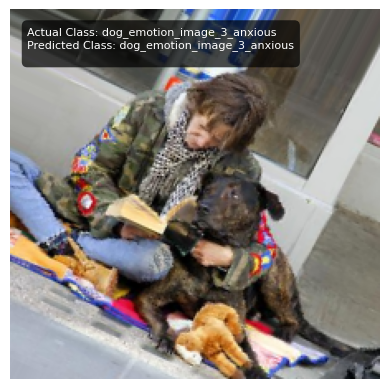

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()


Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 5
1/1 [==============================] - 0s 62ms/step
Predicted Index: 1
Actual Index: 1
Predicted Class Name: ['dog_emotion_image_1_alert']
Actual Class Name: ['dog_emotion_image_1_alert']


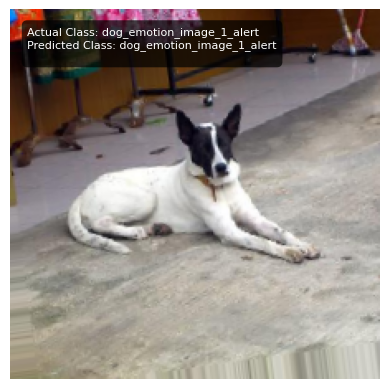

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()



Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : 5
1/1 [==============================] - 0s 65ms/step
Predicted Index: 8
Actual Index: 7
Predicted Class Name: ['dog_emotion_image_8_stress_release']
Actual Class Name: ['dog_emotion_image_7_defensive']


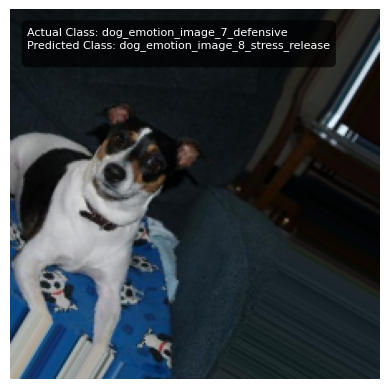

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Assuming 'testing_data' is already defined as a generator with images and labels.
# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the image index to display from the user
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

# Get the model's prediction for the whole batch
predictions = model.predict(images)

# Get the predicted class index for the selected image
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image information
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Prepare the text for prediction confidence
score = tf.nn.softmax(predictions[input_test_image])
confidence = 100 * np.max(score)

# Create the message text that includes both actual and predicted class names along with confidence
prediction_text = (f"Actual Class: {actual_class_name[0]}\n"
                   f"Predicted Class: {predicted_class_name[0]}\n"
                  )

# Convert the image to a PIL object for easier manipulation and visualization
img_array = images[input_test_image]

# Ensure the image is in the correct format (rescale if necessary)
img_array = np.clip(img_array, 0, 1)  # Ensure values are between 0 and 1
img_array = (img_array * 255).astype(np.uint8)  # Scale to 0-255 range for display

# Convert to a PIL image
img_pil = Image.fromarray(img_array)

# Resize the image to match the desired size for the plot (if needed)
img_pil_resized = img_pil.resize((224, 224))

# Create a matplotlib figure
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_pil_resized)
ax.axis('off')  # Hide axes

# Add the prediction text on the image at the top-left corner
plt.text(
    10, 10, prediction_text,  # Position at (10, 10) for top-left corner
    color='white', fontsize=8, ha='left', va='top',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5')
)

# Display the image with the overlayed prediction text
plt.show()

